In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import altair as alt
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/12th Grade/Machine Learning/Data/pokemons.csv')

In [ ]:
df.head()

,id,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total,height,weight,abilities,desc
0,1,bulbasaur,ordinary,generation-i,nothing,grass,poison,45,49,49,65,65,45,318,7,69,overgrow chlorophyll,A strange seed was planted on its back at birt...
1,2,ivysaur,ordinary,generation-i,bulbasaur,grass,poison,60,62,63,80,80,60,405,10,130,overgrow chlorophyll,"When the bulb on its back grows large, it appe..."
2,3,venusaur,ordinary,generation-i,ivysaur,grass,poison,80,82,83,100,100,80,525,20,1000,overgrow chlorophyll,The plant blooms when it is absorbing solar en...
3,4,charmander,ordinary,generation-i,nothing,fire,None,39,52,43,60,50,65,309,6,85,blaze solar-power,"Obviously prefers hot places. When it rains, s..."
4,5,charmeleon,ordinary,generation-i,charmander,fire,None,58,64,58,80,65,80,405,11,190,blaze solar-power,"When it swings its burning tail, it elevates t..."


<ipython-input-8-a4dd9a52bb72>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stats = df.groupby(['type1']).mean()


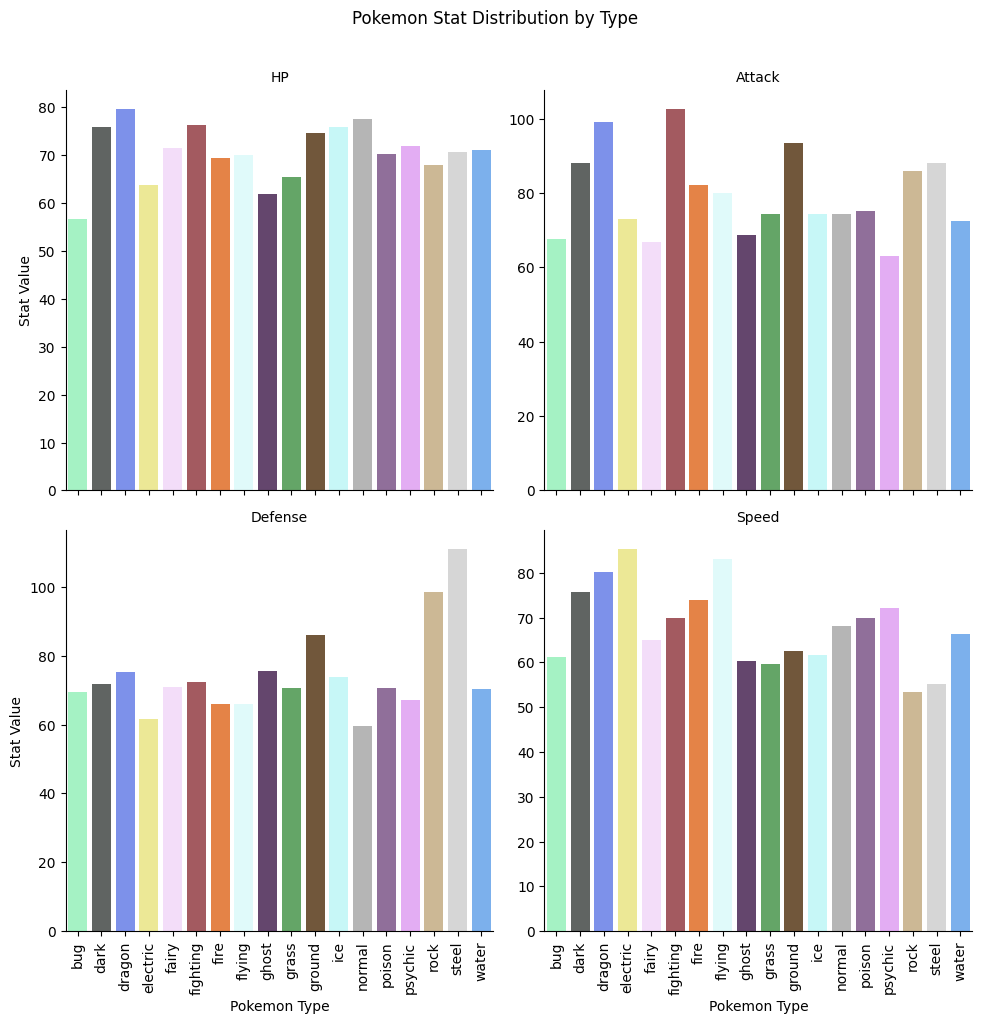

In [ ]:
stats = df.groupby(['type1']).mean()
hp = stats['hp'].values
atk = stats['atk'].values
defe = stats['def'].values
speed = stats['speed'].values
totals = stats['total'].values
types = stats.index
data = pd.DataFrame({'Type': types, 'HP': hp, 'Attack': atk, 'Defense': defe, 'Speed': speed})

type_colors = {
  'bug': '#87ffb7',
  'dark': '#434a46',
  'dragon': '#5170fc',
  'electric': '#faf373',
  'fairy': '#f4d1ff',
  'fighting': '#a12f38',
  'fire': '#ff6608',
  'flying': '#d6ffff',
  'ghost': '#4d1d5c',
  'grass': '#3ca340',
  'ground': '#633a0e',
  'ice': '#b5ffff',
  'normal': '#a8a8a8',
  'poison': '#824e91',
  'psychic': '#e691ff',
  'rock': '#cfaf78',
  'steel': '#cfcfcf',
  'water': '#4fa1ff'
}

melted_df = pd.melt(data, id_vars='Type', var_name='stat', value_name='value')
melted_df['type_colors'] = melted_df['Type'].map(type_colors)
type_palette = list(melted_df['type_colors'].unique())
g = sns.FacetGrid(data=melted_df, col='stat', col_wrap=2, sharey=False, height=5)
g.map_dataframe(sns.barplot, x='Type', y='value', palette=type_colors, alpha=0.85)
g.set_axis_labels('Pokémon Type', 'Stat Value')
g.set_titles(col_template="{col_name}")
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=90)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Pokémon Stat Distribution by Type')
plt.show()

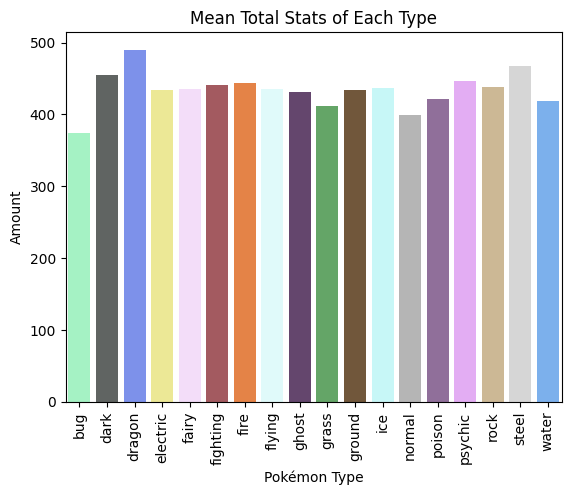

In [ ]:
sns.barplot(x = types, y = totals, palette=type_colors, alpha = 0.85)
plt.xticks(rotation=90)
plt.xlabel('Pokémon Type')
plt.ylabel('Amount')
plt.title('Mean Total Stats of Each Type')
plt.show()

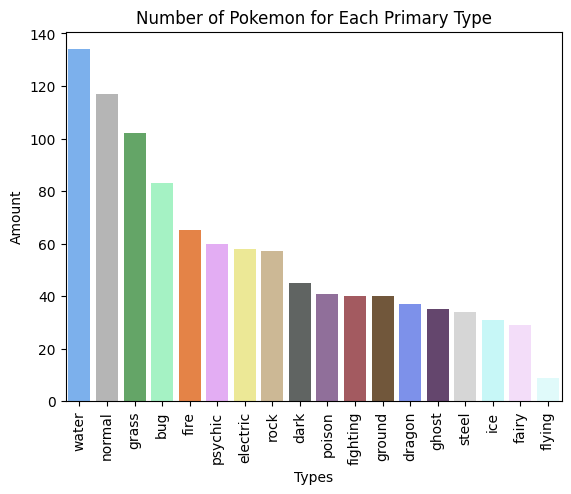

In [ ]:
types = df.groupby(['type1'])['id'].count()
types = types.sort_values(ascending = False)
x = types.index
y = list(types)
g = sns.barplot(x = x, y = y, palette=type_colors, alpha=0.85)
plt.xticks(rotation=90)
plt.xlabel('Types')
plt.ylabel('Amount')
plt.title('Number of Pokémon for Each Primary Type')
plt.show()

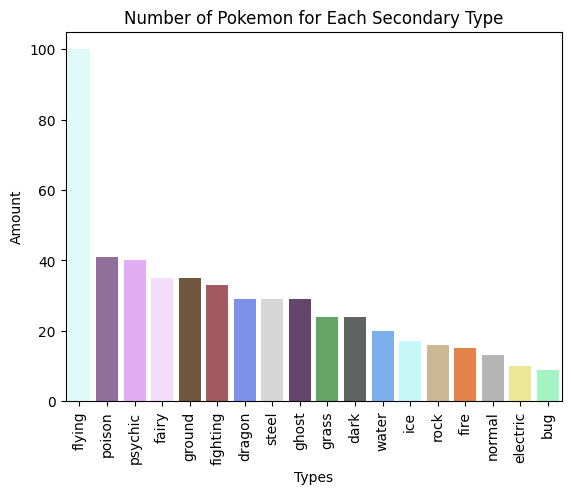

In [ ]:
df2 = df[~(df['type2']=='None')]
types = df2.groupby(['type2'])['id'].count()
types = types.sort_values(ascending = False)
x = types.index
y = list(types)
g = sns.barplot(x = x, y = y, palette=type_colors, alpha=0.85)
plt.xticks(rotation=90)
plt.xlabel('Types')
plt.ylabel('Amount')
plt.title('Number of Pokémon for Each Secondary Type')
plt.show()

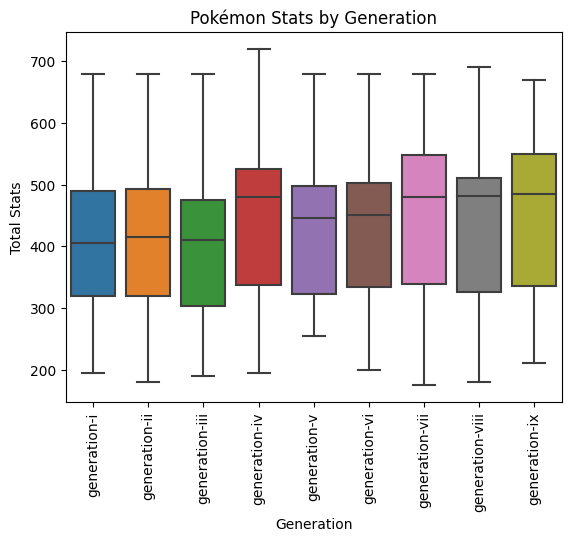

In [ ]:
sns.boxplot(data = df, x = 'generation', y = 'total')
plt.xticks(rotation=90)
plt.xlabel('Generation')
plt.ylabel('Total Stats')
plt.title('Pokémon Stats by Generation')
plt.show()